# ლექცია 13. 
რეგრესია. გადაწყვეტილების ხე. გადაწყვეტილების ხის შედეგების ანალიზი და ამხს-
ნელობითი ძალის შეფასება. მრავალი გადაწყვეტილების ხე.

In [149]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

In [151]:
# import dataset (Profit to Production Cost)
# dataset = pd.read_csv('Data.csv') 
# alternatively open up .csv file to read data  

dataset = np.array( 
[['Asset Flip', 100, 1000], 
['Text Based', 500, 3000], 
['Visual Novel', 1500, 5000], 
['2D Pixel Art', 3500, 8000], 
['2D Vector Art', 5000, 6500], 
['Strategy', 6000, 7000], 
['First Person Shooter', 8000, 15000], 
['Simulator', 9500, 20000], 
['Racing', 12000, 21000], 
['RPG', 14000, 25000], 
['Sandbox', 15500, 27000], 
['Open-World', 16500, 30000], 
['MMOFPS', 25000, 52000], 
['MMORPG', 30000, 80000] 
]) 


print(dataset) 


[['Asset Flip' '100' '1000']
 ['Text Based' '500' '3000']
 ['Visual Novel' '1500' '5000']
 ['2D Pixel Art' '3500' '8000']
 ['2D Vector Art' '5000' '6500']
 ['Strategy' '6000' '7000']
 ['First Person Shooter' '8000' '15000']
 ['Simulator' '9500' '20000']
 ['Racing' '12000' '21000']
 ['RPG' '14000' '25000']
 ['Sandbox' '15500' '27000']
 ['Open-World' '16500' '30000']
 ['MMOFPS' '25000' '52000']
 ['MMORPG' '30000' '80000']]


In [154]:
# select all rows by : and column 1 
# by 1:2 representing features 
X = dataset[:, 1:2].astype(int) 

print(X) 


[[  100]
 [  500]
 [ 1500]
 [ 3500]
 [ 5000]
 [ 6000]
 [ 8000]
 [ 9500]
 [12000]
 [14000]
 [15500]
 [16500]
 [25000]
 [30000]]


In [155]:
# select all rows by : and column 2 
# by 2 to Y representing labels 
y = dataset[:, 2].astype(int) 

print(y) 


[ 1000  3000  5000  8000  6500  7000 15000 20000 21000 25000 27000 30000
 52000 80000]


In [156]:
# import the regressor 
from sklearn.tree import DecisionTreeRegressor 

# create a regressor object 
# regressor = DecisionTreeRegressor(random_state = 0) 
regressor = DecisionTreeRegressor(max_depth=3, random_state = 0) 

# fit the regressor with X and Y data 
regressor.fit(X, y) 


DecisionTreeRegressor(max_depth=3, random_state=0)

In [157]:
# predicting a new value 

# test the output by changing values, like 3750 
y_pred = regressor.predict([[3750]]) 

# print the predicted price 
print("Predicted price: % d\n"% y_pred) 


Predicted price:  6625



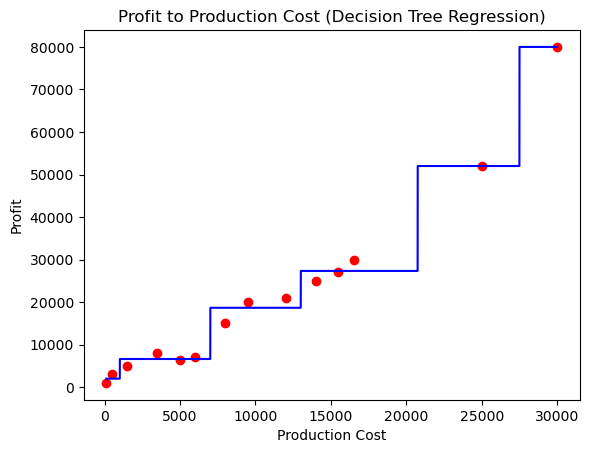

In [158]:
# arange for creating a range of values  from min value of X to max value of X  
# with a difference of 0.01 between two 
# consecutive values 
X_grid = np.arange(min(X), max(X), 0.01) 

# reshape for reshaping the data into 
# a len(X_grid)*1 array, i.e. to make 
# a column out of the X_grid values 
X_grid = X_grid.reshape((len(X_grid), 1)) 

# scatter plot for original data 
plt.scatter(X, y, color = 'red') 

# plot predicted data 
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue') 

# specify title 
plt.title('Profit to Production Cost (Decision Tree Regression)') 

# specify X axis label 
plt.xlabel('Production Cost') 

# specify Y axis label 
plt.ylabel('Profit') 

# show the plot 
plt.show() 


[Text(0.5909090909090909, 0.875, '[100] <= 20750.0\nsquared_error = 440302295.918\nsamples = 14\nvalue = 21464.286'),
 Text(0.36363636363636365, 0.625, '[100] <= 7000.0\nsquared_error = 95352430.556\nsamples = 12\nvalue = 14041.667'),
 Text(0.18181818181818182, 0.375, '[100] <= 1000.0\nsquared_error = 5868055.556\nsamples = 6\nvalue = 5083.333'),
 Text(0.09090909090909091, 0.125, 'squared_error = 1000000.0\nsamples = 2\nvalue = 2000.0'),
 Text(0.2727272727272727, 0.125, 'squared_error = 1171875.0\nsamples = 4\nvalue = 6625.0'),
 Text(0.5454545454545454, 0.375, '[100] <= 13000.0\nsquared_error = 24333333.333\nsamples = 6\nvalue = 23000.0'),
 Text(0.45454545454545453, 0.125, 'squared_error = 6888888.889\nsamples = 3\nvalue = 18666.667'),
 Text(0.6363636363636364, 0.125, 'squared_error = 4222222.222\nsamples = 3\nvalue = 27333.333'),
 Text(0.8181818181818182, 0.625, '[100] <= 27500.0\nsquared_error = 196000000.0\nsamples = 2\nvalue = 66000.0'),
 Text(0.7272727272727273, 0.375, 'squared_er

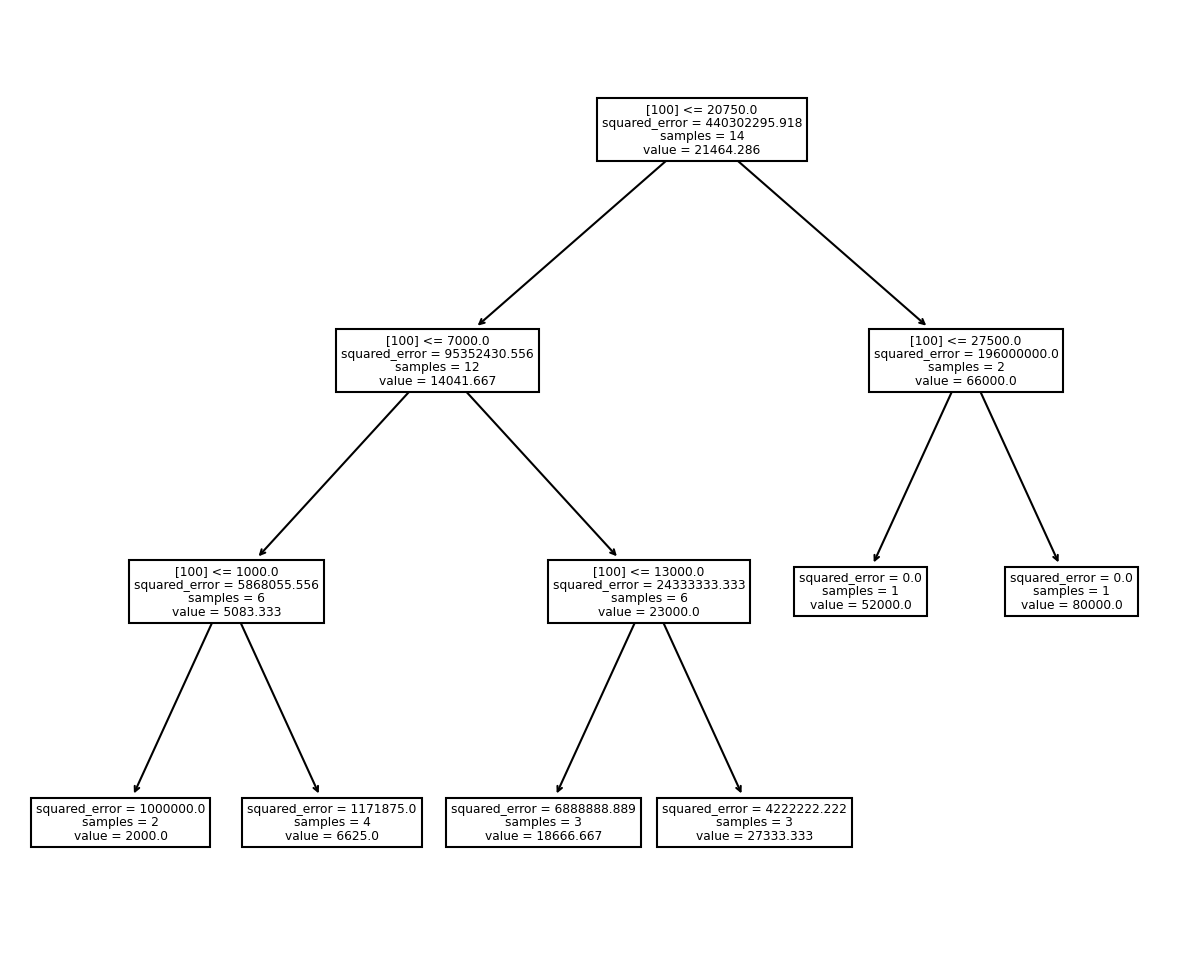

In [159]:
# import export_graphviz 
from sklearn.tree import export_graphviz, plot_tree

# export the decision tree to a tree.dot file 
# for visualizing the plot easily anywhere 
export_graphviz(regressor, out_file ='tree.dot', feature_names =['Production Cost']) 

# The tree is finally exported and shown in the TREE STRUCTURE below, 
# visualized using http://www.webgraphviz.com/ by copying the data from the ‘tree.dot’ file.
plt.figure(figsize=(10,8), dpi=150)
plot_tree(regressor, feature_names=X)

## Exercise 2

In [160]:
# Import the necessary modules and libraries
import matplotlib.pyplot as plt
import numpy as np

from sklearn.tree import DecisionTreeRegressor

In [161]:
# Create a random dataset
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - rng.rand(16))


In [162]:
# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_1.fit(X, y)
regr_2.fit(X, y)

DecisionTreeRegressor(max_depth=5)

In [163]:


# Predict
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test) 

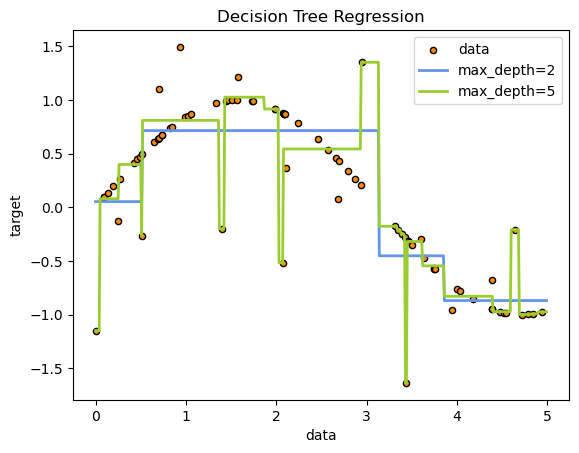

In [164]:
# Plot the results
plt.figure()
plt.scatter(X, y, s=20, edgecolor="black", c="darkorange", label="data")
plt.plot(X_test, y_1, color="cornflowerblue", label="max_depth=2", linewidth=2)
plt.plot(X_test, y_2, color="yellowgreen", label="max_depth=5", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

## Ex. 3
We will try and predict gas consumptions (in millions of gallons) in 48 US states based upon gas tax (in cents), per capita income (dollars), paved highways (in miles) and the proportion of population with a drivers license.



In [165]:
# Importing the libraries
import numpy as np # for array operations
import pandas as pd # for working with DataFrames
import matplotlib.pyplot as plt # for data visualization
%matplotlib inline



In [166]:
# Reading the data 
dataset = pd.read_csv("petrol_consumption.csv")
dataset.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [167]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101 entries, 0 to 103
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   case      101 non-null    int64  
 1   site      101 non-null    int64  
 2   Pop       101 non-null    object 
 3   sex       101 non-null    object 
 4   age       101 non-null    float64
 5   hdlngth   101 non-null    float64
 6   skullw    101 non-null    float64
 7   totlngth  101 non-null    float64
 8   taill     101 non-null    float64
 9   footlgth  101 non-null    float64
 10  earconch  101 non-null    float64
 11  eye       101 non-null    float64
 12  chest     101 non-null    float64
 13  belly     101 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 11.8+ KB


In [168]:
#Separating the features and the target variable
X = dataset.drop('Petrol_Consumption', axis = 1) # Features
y = dataset['Petrol_Consumption']  # Target

In [169]:
# scikit-learn modules
from sklearn.model_selection import train_test_split # for splitting the data

# Splitting the dataset into training and testing set (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 28)

In [170]:
from sklearn.tree import DecisionTreeRegressor # for building the model
# Initializing the Decision Tree Regression model
regressor = DecisionTreeRegressor(random_state = 0)

# Fitting the Decision Tree Regression model to the data
regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [171]:
from sklearn.metrics import mean_squared_error # for calculating the cost function
# Predicting the target values of the test set
y_pred = regressor.predict(X_test)

# RMSE (Root Mean Square Error)
rmse = float(format(np.sqrt(mean_squared_error(y_test, y_pred)), '.3f'))
print("\nRMSE: ", rmse)



RMSE:  133.351


In [172]:
y_pred = regressor.predict(X_test) 
y_pred

array([508., 577., 525., 524., 464., 508., 344., 628., 534., 640.])

In [173]:
from sklearn.tree import export_graphviz  

# export the decision tree model to a tree_structure.dot file 
# paste the contents of the file to webgraphviz.com
export_graphviz(regressor, out_file ='tree_structure.dot', 
               feature_names =['Petrol_tax', 'Average_income', 'Paved_Highways', 'Population_Driver_licence(%)'])

# Ex. 4
The possum dataset contains data about 104 possums:

sex,
age,
head length,
skull width,
etc.
We’ll create a regression tree to predict the age of possums based on certain characteristics of the animals.

https://www.kaggle.com/datasets/abrambeyer/openintro-possum/

In [174]:
import pandas as pd
import matplotlib.pyplot as plt

In [175]:
df = pd.read_csv("possum.csv")
df.head()

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0


In [176]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   case      104 non-null    int64  
 1   site      104 non-null    int64  
 2   Pop       104 non-null    object 
 3   sex       104 non-null    object 
 4   age       102 non-null    float64
 5   hdlngth   104 non-null    float64
 6   skullw    104 non-null    float64
 7   totlngth  104 non-null    float64
 8   taill     104 non-null    float64
 9   footlgth  103 non-null    float64
 10  earconch  104 non-null    float64
 11  eye       104 non-null    float64
 12  chest     104 non-null    float64
 13  belly     104 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 11.5+ KB


In [177]:
df = df.dropna()

In [178]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101 entries, 0 to 103
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   case      101 non-null    int64  
 1   site      101 non-null    int64  
 2   Pop       101 non-null    object 
 3   sex       101 non-null    object 
 4   age       101 non-null    float64
 5   hdlngth   101 non-null    float64
 6   skullw    101 non-null    float64
 7   totlngth  101 non-null    float64
 8   taill     101 non-null    float64
 9   footlgth  101 non-null    float64
 10  earconch  101 non-null    float64
 11  eye       101 non-null    float64
 12  chest     101 non-null    float64
 13  belly     101 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 11.8+ KB


In [179]:
df

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,100,7,other,m,1.0,89.5,56.0,81.5,36.5,66.0,46.8,14.8,23.0,27.0
100,101,7,other,m,1.0,88.6,54.7,82.5,39.0,64.4,48.0,14.0,25.0,33.0
101,102,7,other,f,6.0,92.4,55.0,89.0,38.0,63.5,45.4,13.0,25.0,30.0
102,103,7,other,m,4.0,91.5,55.2,82.5,36.5,62.9,45.9,15.4,25.0,29.0


In [180]:
X = df.iloc[:, 5:]
y =df['age']


In [181]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=44)

In [182]:
from sklearn.tree import DecisionTreeRegressor

In [183]:
model = DecisionTreeRegressor(random_state=44)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
predictions

array([7., 2., 9., 5., 2., 4., 7., 1., 2., 2., 3., 2., 3., 7., 3., 6., 2.,
       2., 2., 1., 4., 2., 2., 3., 3., 4., 7., 3., 7., 4., 5.])

In [184]:
X_test

,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
57,94.5,64.2,91.0,39.0,66.5,46.4,14.4,30.5,33.0
80,90.6,56.0,85.5,38.0,65.6,41.7,17.0,27.5,35.0
27,93.8,56.8,87.0,34.5,73.2,53.0,15.3,27.0,30.0
97,93.2,68.6,84.0,35.0,65.6,44.3,14.5,28.5,32.0
61,91.3,58.0,90.5,39.0,65.5,41.3,16.0,27.0,32.0
69,91.9,56.4,87.0,38.0,65.4,44.1,13.0,27.0,34.0
7,94.8,57.6,91.0,37.0,72.7,53.9,14.5,29.0,34.0
26,90.5,54.5,85.0,35.0,70.3,50.8,14.2,23.0,28.0
24,95.8,58.5,91.5,35.5,72.3,51.6,14.9,31.0,35.0
65,90.4,55.8,86.0,36.5,63.2,44.2,15.7,26.5,34.0


In [185]:
y_test

57     3.0
80     3.0
27     4.0
97     5.0
61     3.0
69     7.0
7      6.0
26     2.0
24     3.0
65     3.0
71     1.0
30     3.0
38     1.0
76     6.0
19     4.0
103    3.0
44     3.0
33     2.0
11     5.0
72     1.0
83     3.0
39     3.0
5      1.0
73     4.0
51     6.0
94     4.0
56     4.0
96     3.0
89     3.0
90     3.0
98     3.0
Name: age, dtype: float64

In [186]:
X_train

,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
4,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0
78,85.8,50.0,81.0,36.5,62.8,43.0,14.8,22.0,28.5
100,88.6,54.7,82.5,39.0,64.4,48.0,14.0,25.0,33.0
0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
91,90.7,56.3,85.0,37.0,67.6,46.8,14.5,25.5,31.0
...,...,...,...,...,...,...,...,...,...
3,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
62,92.0,56.4,88.5,38.0,64.1,46.3,15.2,25.5,28.5
48,95.4,59.2,85.0,37.0,69.0,45.0,15.9,29.5,35.5
35,93.3,59.3,88.0,35.0,74.3,52.0,14.9,25.5,36.0


In [187]:
y_predict = model.predict(X_train)
y_predict

array([2., 1., 1., 8., 2., 7., 7., 4., 3., 4., 5., 5., 3., 3., 4., 3., 2.,
       3., 2., 3., 5., 5., 2., 3., 9., 4., 3., 2., 9., 3., 2., 6., 5., 6.,
       6., 5., 4., 6., 2., 3., 7., 2., 1., 1., 3., 4., 5., 5., 5., 4., 2.,
       1., 2., 5., 6., 7., 7., 6., 6., 3., 4., 2., 2., 1., 2., 6., 6., 4.,
       7., 3.])

[Text(0.32659313725490197, 0.9444444444444444, 'hdlngth <= 91.55\nsquared_error = 4.128\nsamples = 70\nvalue = 4.014'),
 Text(0.058823529411764705, 0.8333333333333334, 'chest <= 23.75\nsquared_error = 0.888\nsamples = 20\nvalue = 2.25'),
 Text(0.0392156862745098, 0.7222222222222222, 'squared_error = 0.0\nsamples = 4\nvalue = 1.0'),
 Text(0.0784313725490196, 0.7222222222222222, 'footlgth <= 63.0\nsquared_error = 0.621\nsamples = 16\nvalue = 2.562'),
 Text(0.0392156862745098, 0.6111111111111112, 'eye <= 14.7\nsquared_error = 0.24\nsamples = 5\nvalue = 3.4'),
 Text(0.0196078431372549, 0.5, 'squared_error = 0.0\nsamples = 3\nvalue = 3.0'),
 Text(0.058823529411764705, 0.5, 'squared_error = 0.0\nsamples = 2\nvalue = 4.0'),
 Text(0.11764705882352941, 0.6111111111111112, 'skullw <= 54.65\nsquared_error = 0.331\nsamples = 11\nvalue = 2.182'),
 Text(0.09803921568627451, 0.5, 'squared_error = 0.0\nsamples = 2\nvalue = 3.0'),
 Text(0.13725490196078433, 0.5, 'taill <= 39.75\nsquared_error = 0.222\n

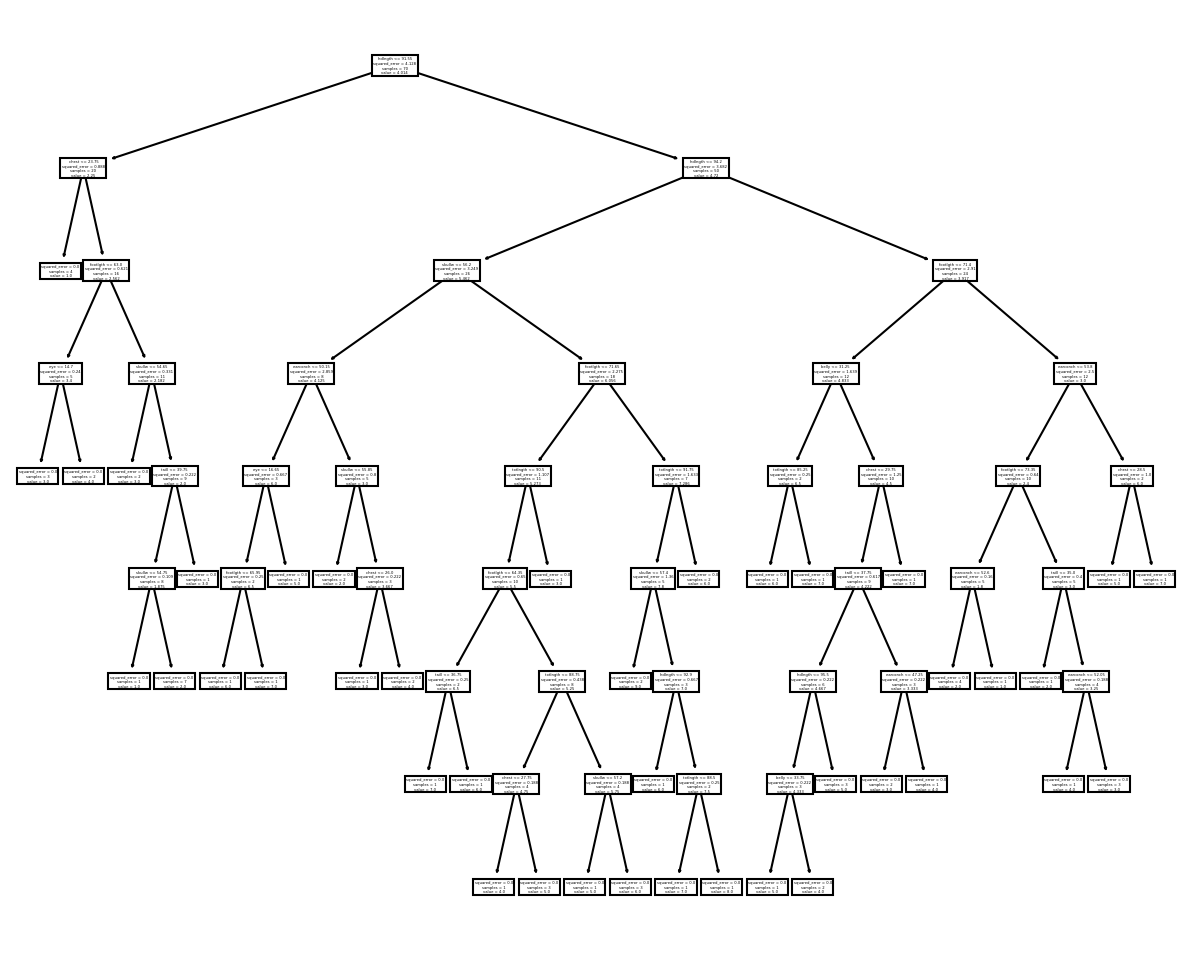

In [188]:
from sklearn.tree import plot_tree
plt.figure(figsize=(10,8), dpi=150)
plot_tree(model, feature_names=X.columns)